In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/Data/Energy_consumption.csv',index_col= "Timestamp",parse_dates=True)

In [13]:
columns_to_remove = [
    'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
    'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday'
]

df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')

In [14]:
df_cleaned.head()

,EnergyConsumption
Timestamp,
2022-01-01 00:00:00,75.364373
2022-01-01 01:00:00,83.401855
2022-01-01 02:00:00,78.270888
2022-01-01 03:00:00,56.519850
2022-01-01 04:00:00,70.811732


In [3]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df['DayOfWeek'] = df.index.day_name()

In [5]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Saturday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Saturday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Saturday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Saturday,No,70.811732


In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
def create_lag_features(data, target_col, n_lags):
    df = data.copy()
    for lag in range(1, n_lags + 1):
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    df.dropna(inplace=True)
    return df

In [15]:
n_lags = 10  # You can try 5, 10, etc.
df_lagged = create_lag_features(df_cleaned, 'EnergyConsumption', n_lags)

In [16]:
df_lagged

,EnergyConsumption,EnergyConsumption_lag_1,EnergyConsumption_lag_2,EnergyConsumption_lag_3,EnergyConsumption_lag_4,EnergyConsumption_lag_5,EnergyConsumption_lag_6,EnergyConsumption_lag_7,EnergyConsumption_lag_8,EnergyConsumption_lag_9,EnergyConsumption_lag_10
Timestamp,,,,,,,,,,,
2022-01-01 10:00:00,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888,83.401855,75.364373
2022-01-01 11:00:00,73.278670,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888,83.401855
2022-01-01 12:00:00,84.144776,73.278670,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888
2022-01-01 13:00:00,60.022519,84.144776,73.278670,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850
2022-01-01 14:00:00,81.183188,60.022519,84.144776,73.278670,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,82.306692,89.964064,83.299462,93.639644,64.903078,74.638956,71.775781,86.780203,73.621237,62.729873,85.271028
2022-02-11 12:00:00,66.577320,82.306692,89.964064,83.299462,93.639644,64.903078,74.638956,71.775781,86.780203,73.621237,62.729873
2022-02-11 13:00:00,72.753471,66.577320,82.306692,89.964064,83.299462,93.639644,64.903078,74.638956,71.775781,86.780203,73.621237


In [17]:
X = df_lagged.drop(['EnergyConsumption'], axis=1)
y = df_lagged['EnergyConsumption']

# 80-20 time-based split
split = int(len(df_lagged) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [18]:
y_test

Timestamp
2022-02-03 10:00:00    71.583166
2022-02-03 11:00:00    67.221100
2022-02-03 12:00:00    80.080330
2022-02-03 13:00:00    74.244221
2022-02-03 14:00:00    87.809525
                         ...    
2022-02-11 11:00:00    82.306692
2022-02-11 12:00:00    66.577320
2022-02-11 13:00:00    72.753471
2022-02-11 14:00:00    76.950389
2022-02-11 15:00:00    71.545311
Name: EnergyConsumption, Length: 198, dtype: float64

In [19]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [20]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 8.95


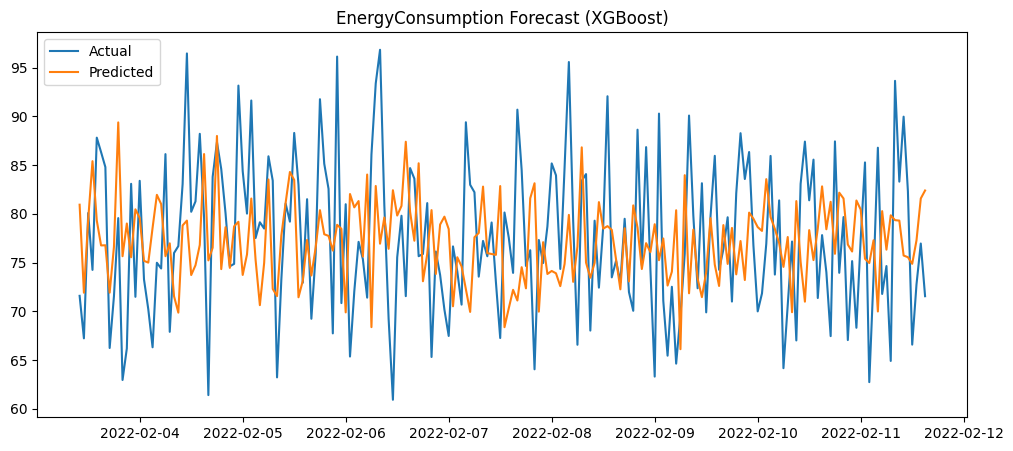

In [21]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('EnergyConsumption Forecast (XGBoost)')
plt.legend()
plt.show()